# **Importing necessary libraries**

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# **Downloading Dataset**

In [16]:
import pathlib
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=url, untar=True)
data_dir = pathlib.Path(data_dir)

# **Visualizing**

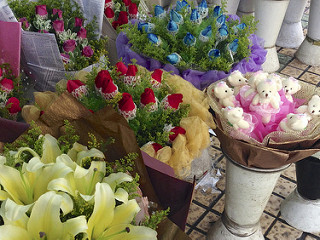

In [17]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[65]))

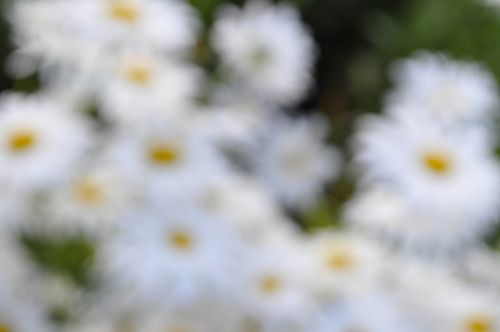

In [18]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[65]))

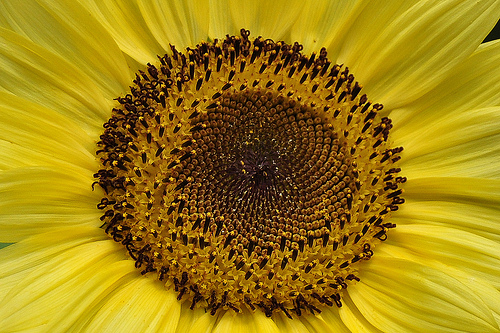

In [19]:
sunflower = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflower[5]))

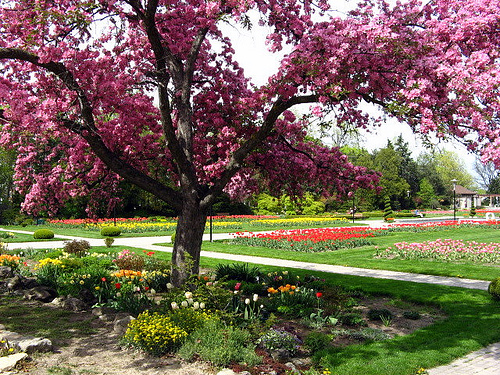

In [20]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[65]))

# **Splitting the Dataset**

In [21]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical'
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [22]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical'
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [23]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


# Training The Model


In [25]:
model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_2 (ModuleWr  (None, 2048)              0         
 apper)                                                          
                                                                 
 module_wrapper_3 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_4 (ModuleWr  (None, 5)                 2565      
 apper)                                                          
                                                                 
Total params: 24639365 (93.99 MB)
Trainable params: 1051653 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
________

In [27]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
92/92 [==============================] - 25s 185ms/step - loss: 0.6967 - accuracy: 0.7919 - val_loss: 0.3408 - val_accuracy: 0.8828
Epoch 2/10
92/92 [==============================] - 12s 130ms/step - loss: 0.2317 - accuracy: 0.9166 - val_loss: 0.3247 - val_accuracy: 0.8883
Epoch 3/10
92/92 [==============================] - 12s 129ms/step - loss: 0.1421 - accuracy: 0.9547 - val_loss: 0.3912 - val_accuracy: 0.8678
Epoch 4/10
92/92 [==============================] - 12s 128ms/step - loss: 0.0755 - accuracy: 0.9782 - val_loss: 0.3319 - val_accuracy: 0.8965
Epoch 5/10
92/92 [==============================] - 13s 139ms/step - loss: 0.0365 - accuracy: 0.9952 - val_loss: 0.3747 - val_accuracy: 0.8910
Epoch 6/10
92/92 [==============================] - 12s 129ms/step - loss: 0.0137 - accuracy: 0.9997 - val_loss: 0.3476 - val_accuracy: 0.8951
Epoch 7/10
92/92 [==============================] - 12s 131ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.3603 - val_accuracy: 0.9060

# Evaluating The Model

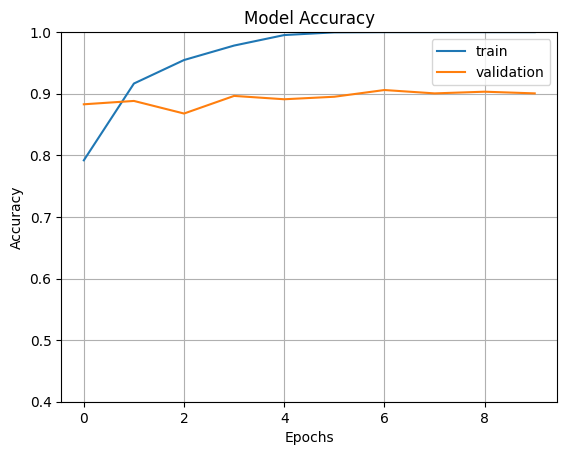

In [29]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

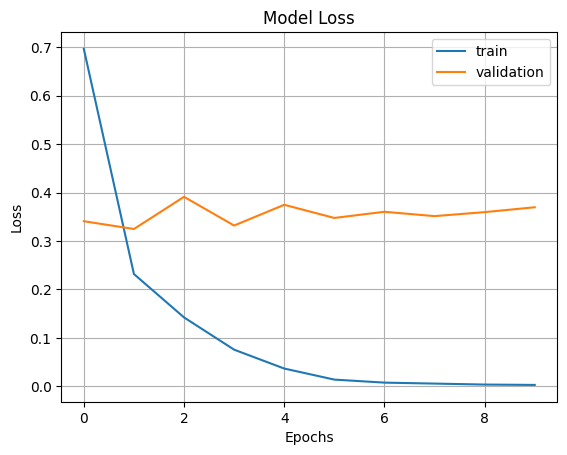

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

In [42]:
import cv2
image=cv2.imread('/content/download.jpg')
image_resized= cv2.resize(image,(img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 224, 224, 3)


In [43]:
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 47ms/step
[[9.9999964e-01 9.8107487e-09 1.8310328e-07 1.6327080e-07 1.7425352e-08]]


In [44]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is daisy
